<a href="https://colab.research.google.com/github/dohyung-kim/ccri/blob/main/script/adm0/pillar1_processing_adm0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np
import pandas as pd
import glob
import os
import shutil
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy.stats import normaltest, probplot, skew, kurtosis

Summarize P1 layers

In [8]:
# Folder containing the CSV files
path = r'/content/drive/MyDrive/p1_exposure'
all_files = glob.glob(path + "/*.csv")

for file in all_files:
    # Exclude the specified file
    df = pd.read_csv(file, index_col=None, header=0)
    filename_only = file.split('/')[-1]
    first_two_words = '_'.join(filename_only.split('_')[:2])
    print(f"{first_two_words}: {df['child_population_exposed'].sum()}")


drought_spi: 15204912.524710376
heatwave_frequency: 1000872294.6355909
heatwave_severity: 291263685.9577969
extreme_heat: 869300962.1684117
tropical_storm: 669133071.0221139
river_flood: 350888604.0034763
drought_sma: 8370199.59184361
heatwave_duration: 1264524693.8094962
coastal_flood: 33449461.939604394
agricultural_drought: 768300650.3412236
fire_FRP: 88017702.05601117
fire_frequency: 141789211.11043173
air_pollution: 2310769798.2956133
vectorborne_malariapv: 627060637.7644368
sand_dust: 130761587.70998535
vectorborne_malariapf: 704569242.1616311


Hazard data normalization test with plots

In [9]:
#define function to remove outliers and find min max values to reduce skew
def trim_outliers_iteratively(values, max_skew=2, max_kurtosis=3.5):
    """
    Iteratively removes extreme min/max values until skewness <= 2 and kurtosis <= 3.5.
    Returns the trimmed dataset along with the final min and max.
    """
    # values = values.dropna().values  # Ensure no NaNs
    # values = np.log1p(values)
    while True:
        current_skew = skew(values)
        current_kurtosis = kurtosis(values)

        if abs(current_skew) <= max_skew and current_kurtosis <= max_kurtosis:
            break  # Stop if conditions are met

        # Remove min and max values
        min_val, max_val = values.min(), values.max()
        values = values[(values > min_val) & (values < max_val)]  # Trim extreme min/max

    return values, values.min(), values.max()

In [10]:
def boxplot_outlier_detection(values):
    """
    Detect outliers using the IQR method (1.5 IQR rule).
    """
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = np.percentile(values, 25)
    Q3 = np.percentile(values, 75)
    # Calculate IQR (Interquartile Range)
    IQR = Q3 - Q1
    # Define lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Return values that are within bounds
    return values[(values >= lower_bound) & (values <= upper_bound)], lower_bound, upper_bound

ploting normalized absolute exposure

processed : drought_spi min: 0.1 max: 6.6874435902400755
drought_spi: Log Transformation and Scaling - skew=1.578, kurtosis=0.925
IQR processed : drought_spi min: 0.1 max: 0.1


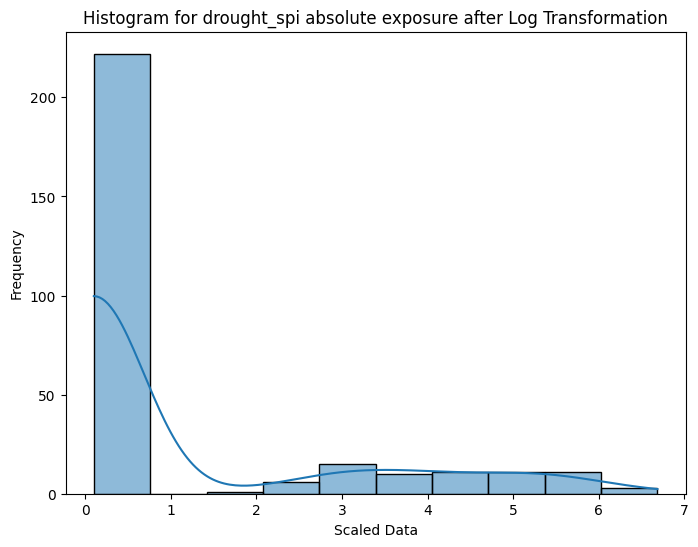

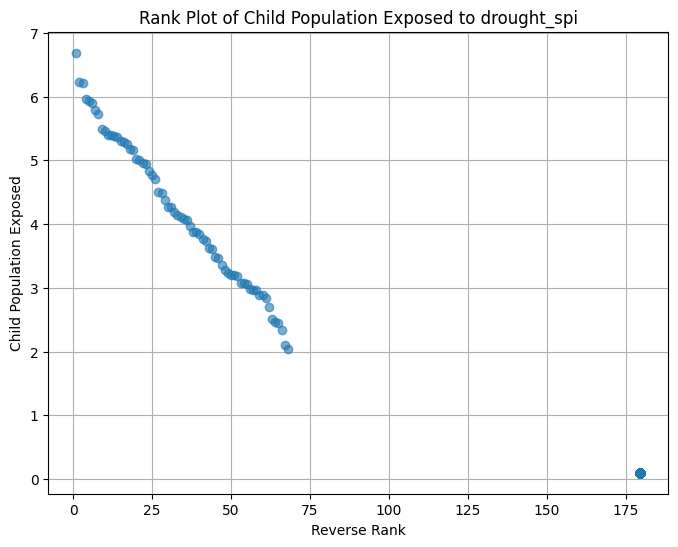

processed : heatwave_frequency min: 0.1 max: 8.288150221120683
heatwave_frequency: Log Transformation and Scaling - skew=-0.513, kurtosis=-1.395
IQR processed : heatwave_frequency min: -9.120403369684846 max: 15.467338949474742


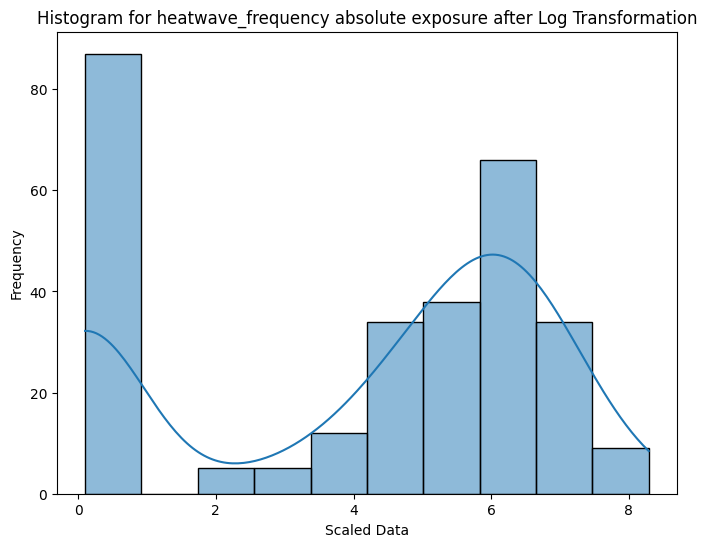

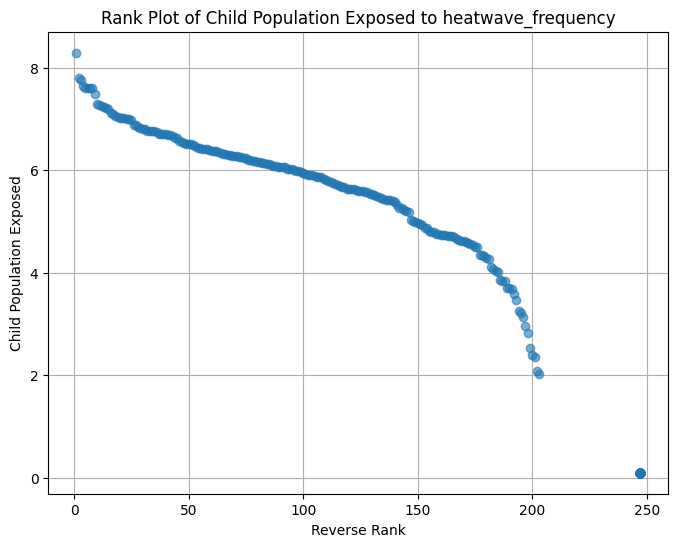

processed : heatwave_severity min: 0.1 max: 7.711766960422699
heatwave_severity: Log Transformation and Scaling - skew=0.912, kurtosis=-1.003
IQR processed : heatwave_severity min: -7.028360542623611 max: 11.980600904372684


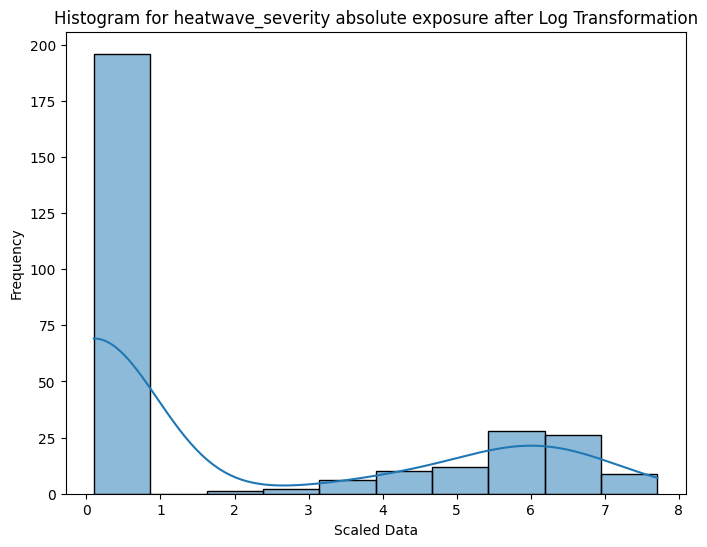

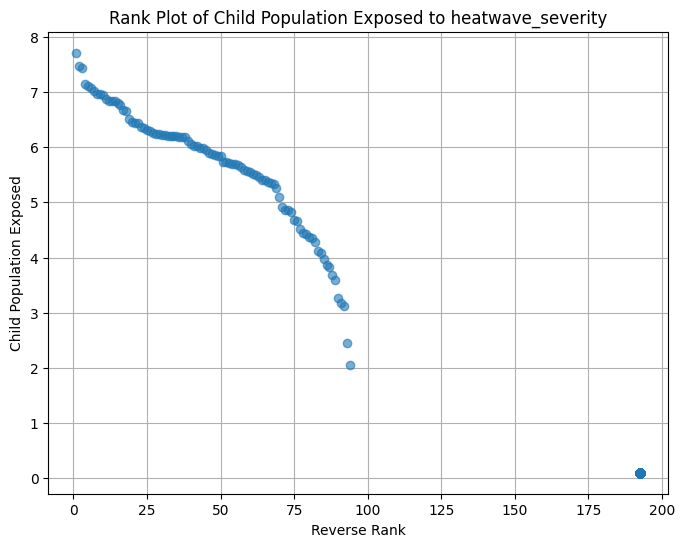

processed : extreme_heat min: 0.1 max: 8.557389159890821
extreme_heat: Log Transformation and Scaling - skew=0.704, kurtosis=-1.343
IQR processed : extreme_heat min: -7.957000374688713 max: 13.528333957814521


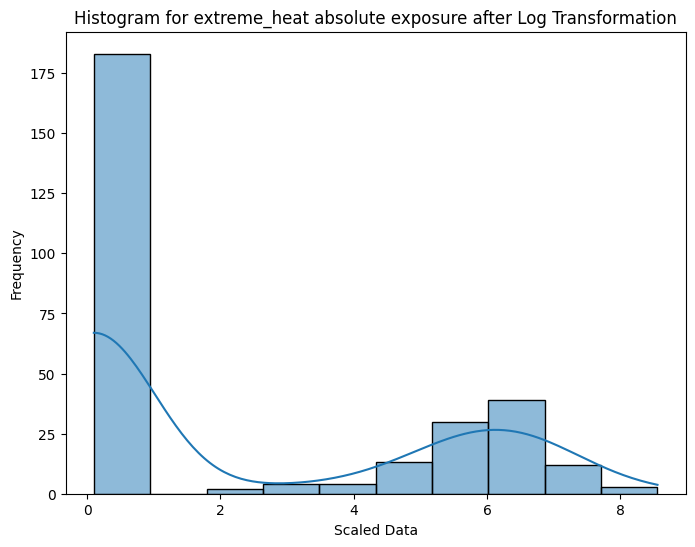

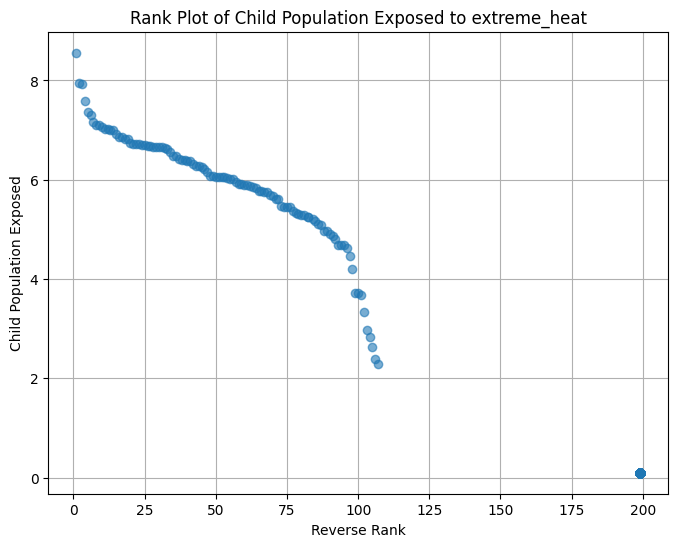

processed : tropical_storm min: 0.1 max: 8.194577491138853
tropical_storm: Log Transformation and Scaling - skew=0.697, kurtosis=-1.191
IQR processed : tropical_storm min: -6.887888210106446 max: 11.74648035017741


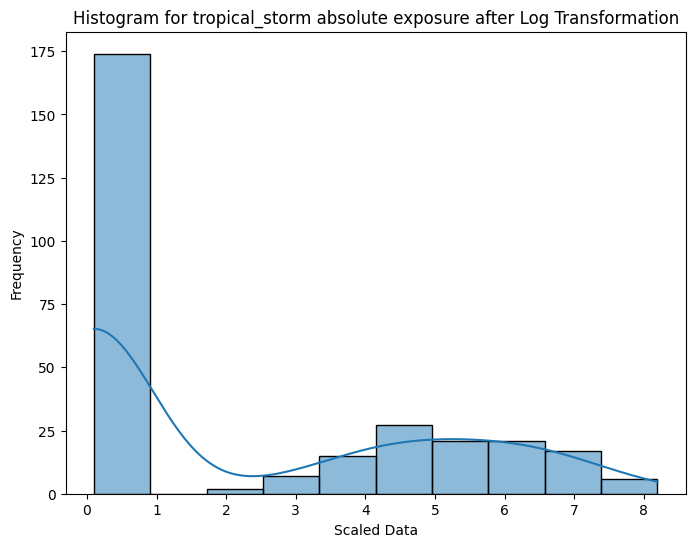

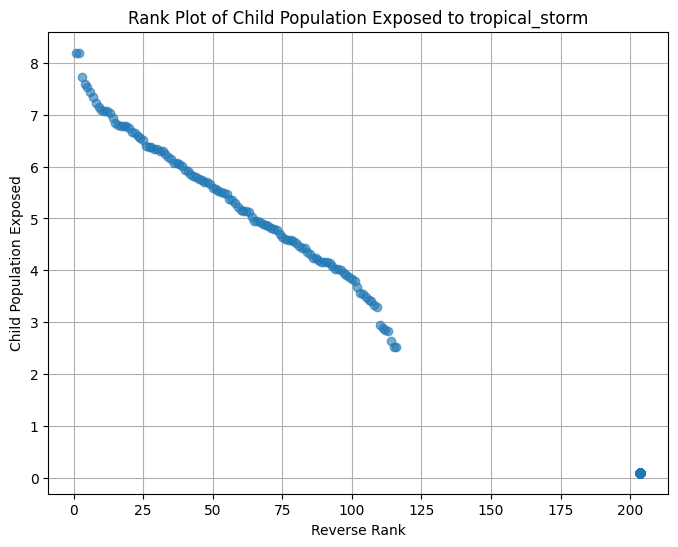

processed : river_flood min: 0.1 max: 7.874513200097062
river_flood: Log Transformation and Scaling - skew=-0.106, kurtosis=-1.681
IQR processed : river_flood min: -7.757897347265358 max: 13.196495578775595


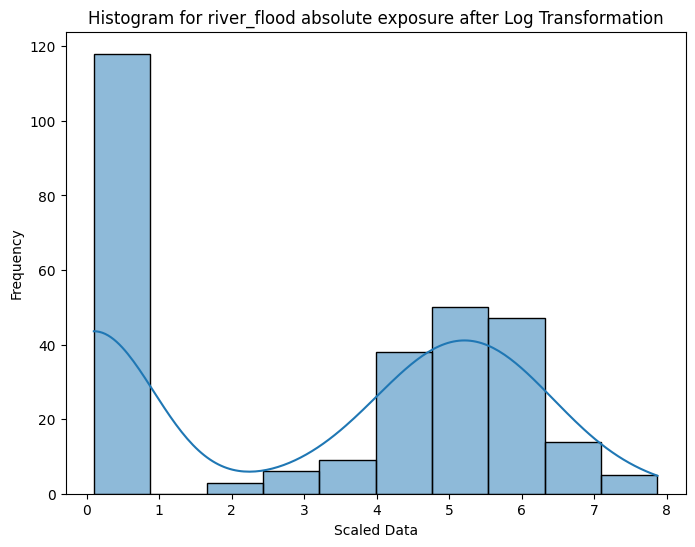

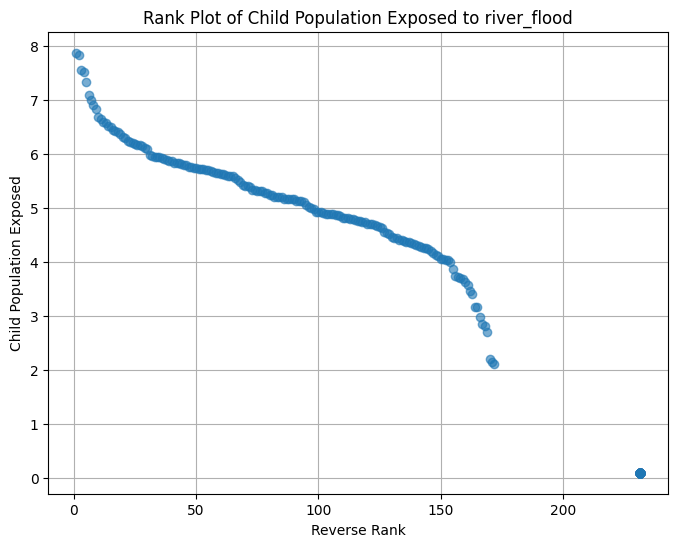

processed : drought_sma min: 0.1 max: 6.029423580419458
drought_sma: Log Transformation and Scaling - skew=1.933, kurtosis=2.016
IQR processed : drought_sma min: 0.1 max: 0.1


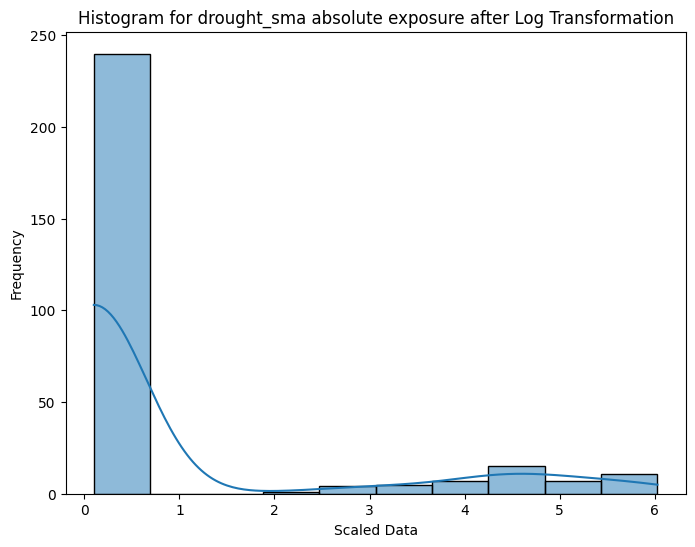

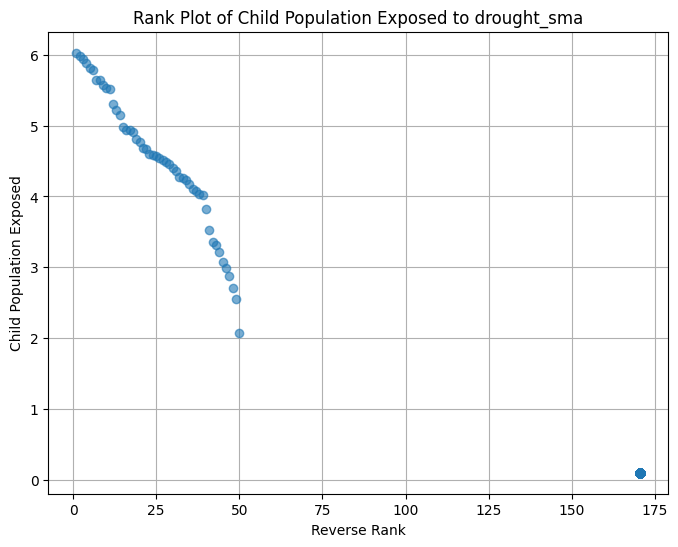

processed : heatwave_duration min: 0.1 max: 8.321082422870152
heatwave_duration: Log Transformation and Scaling - skew=-0.384, kurtosis=-1.511
IQR processed : heatwave_duration min: -9.138335675600645 max: 15.497226126001074


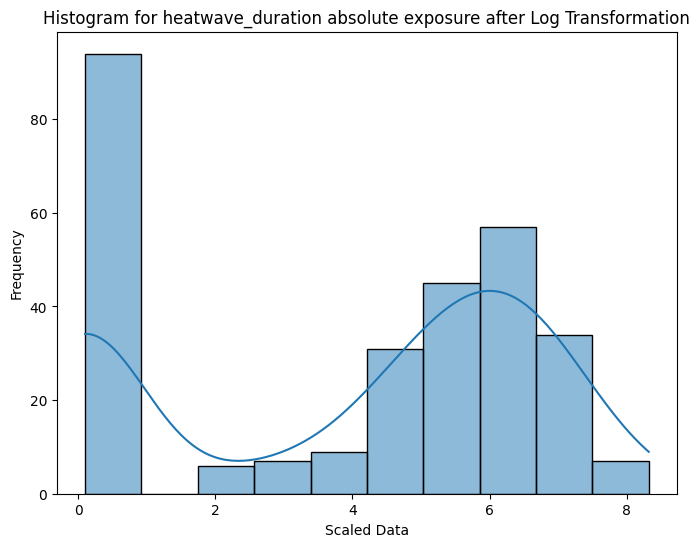

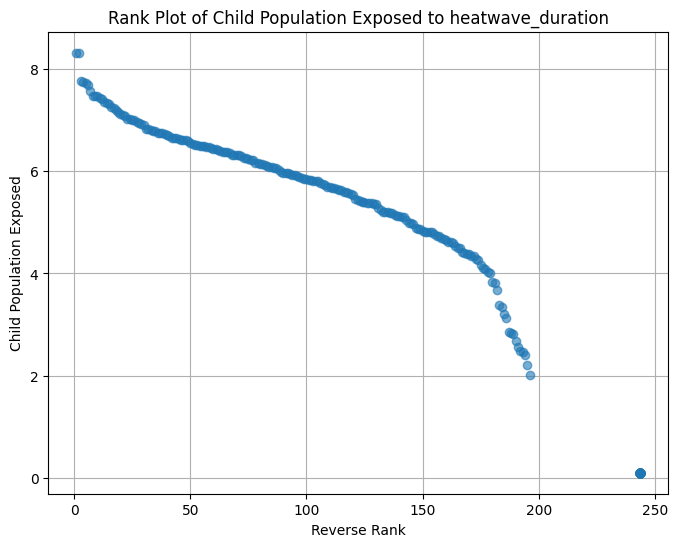

processed : coastal_flood min: 0.1 max: 7.131548303845231
coastal_flood: Log Transformation and Scaling - skew=0.398, kurtosis=-1.278
IQR processed : coastal_flood min: -5.3418231526634905 max: 9.169705254439151


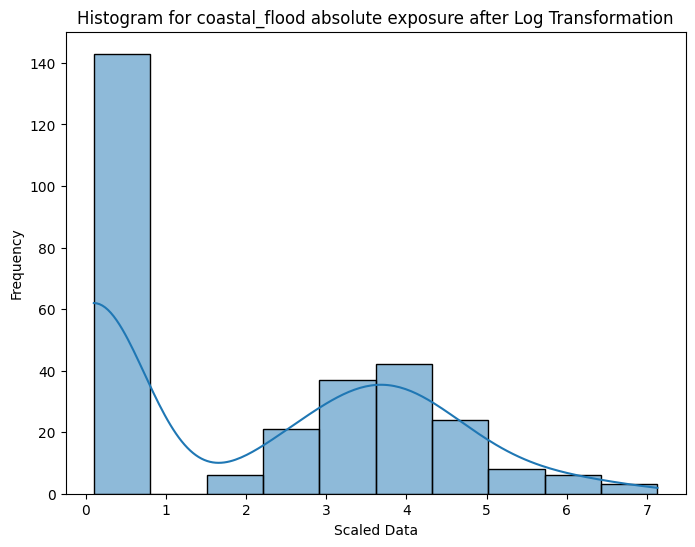

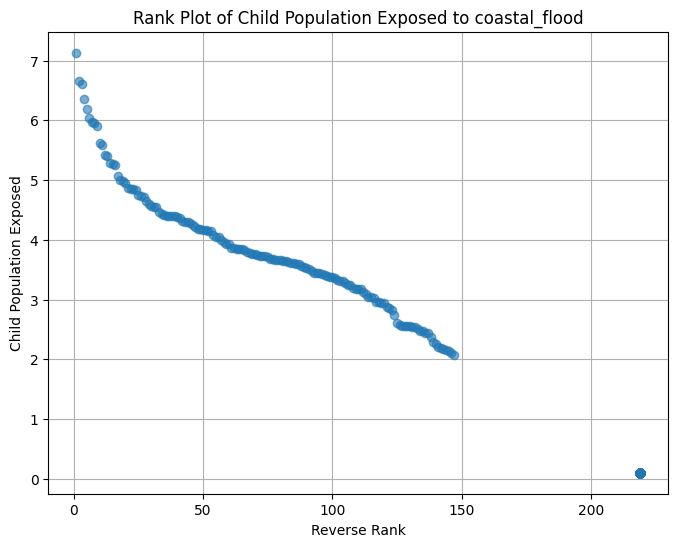

processed : agricultural_drought min: 0.1 max: 8.385186959092351
agricultural_drought: Log Transformation and Scaling - skew=0.140, kurtosis=-1.590
IQR processed : agricultural_drought min: -7.763610916374338 max: 13.20601819395723


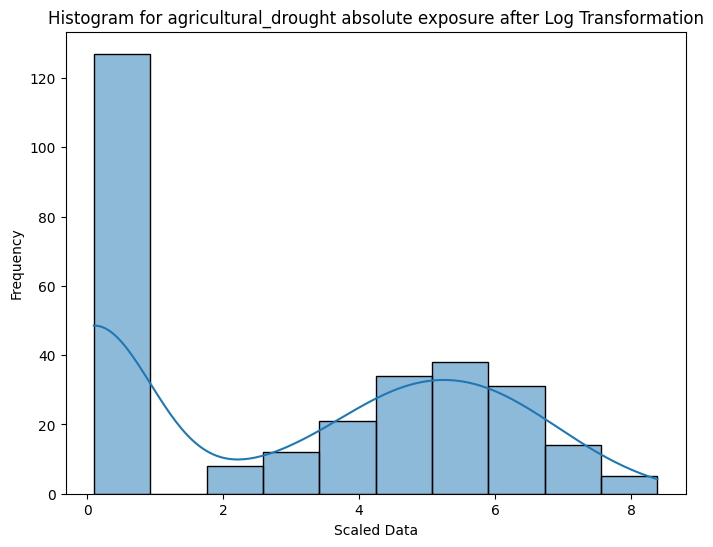

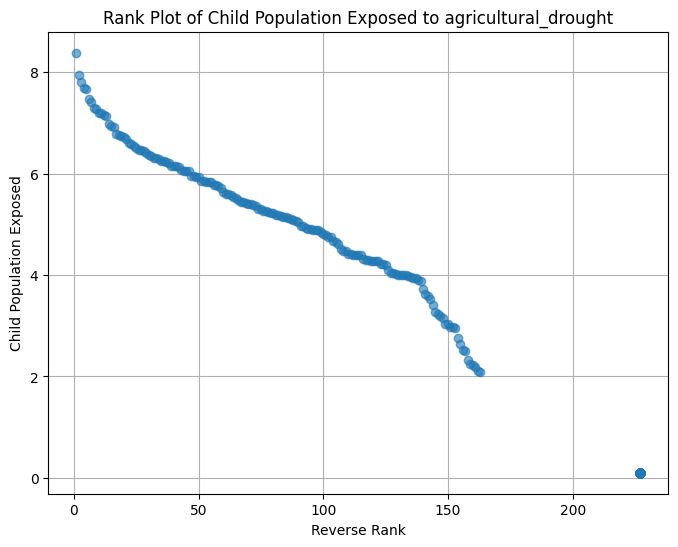

processed : fire_FRP min: 0.1 max: 6.877558861921151
fire_FRP: Log Transformation and Scaling - skew=-0.262, kurtosis=-1.627
IQR processed : fire_FRP min: -7.621675798045631 max: 12.969459663409385


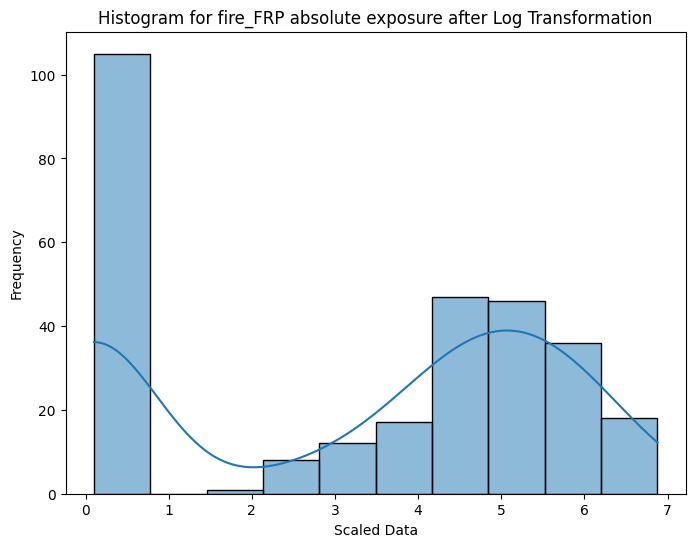

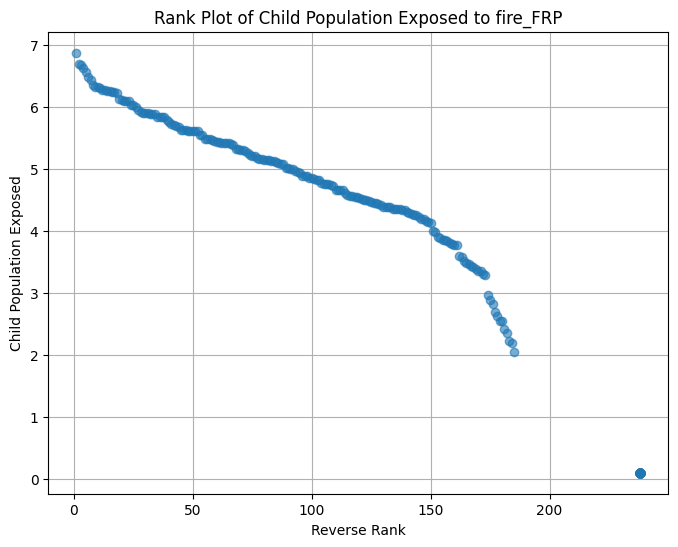

processed : fire_frequency min: 0.1 max: 7.350277241206103
fire_frequency: Log Transformation and Scaling - skew=-0.042, kurtosis=-1.606
IQR processed : fire_frequency min: -7.390455190773437 max: 12.584091984622393


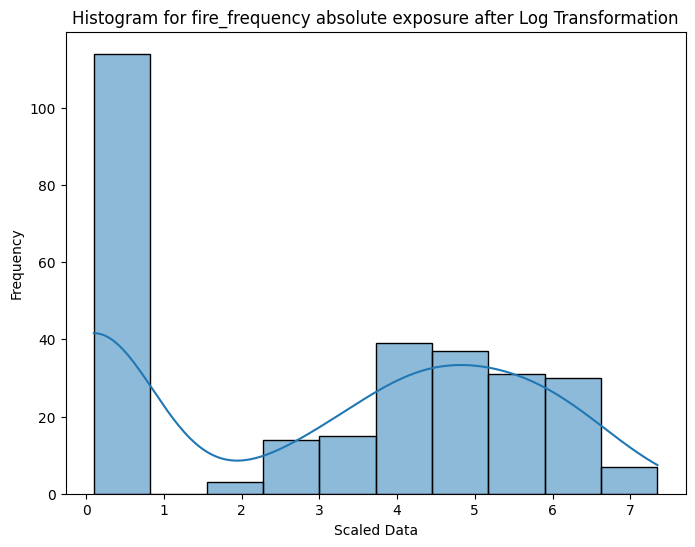

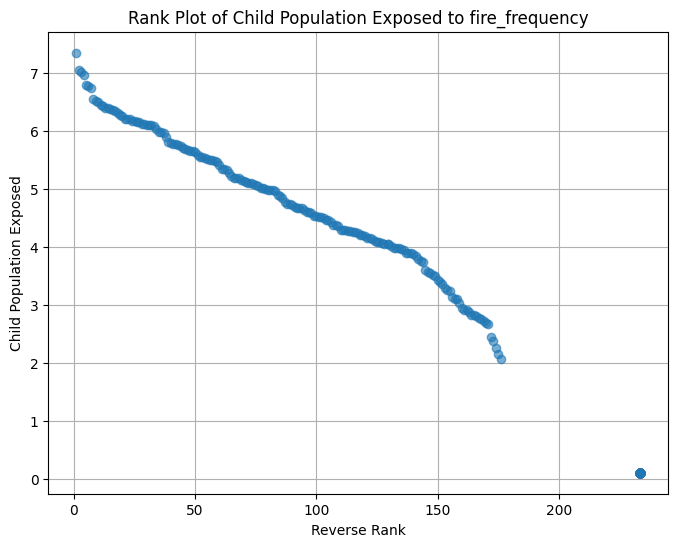

processed : air_pollution min: 0.1 max: 8.628127848167718
air_pollution: Log Transformation and Scaling - skew=-0.781, kurtosis=-0.876
IQR processed : air_pollution min: -2.4108313517680036 max: 12.189584642768896


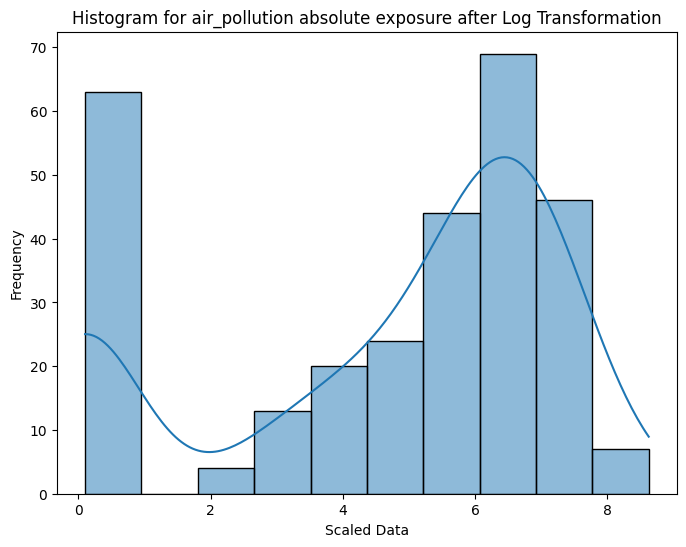

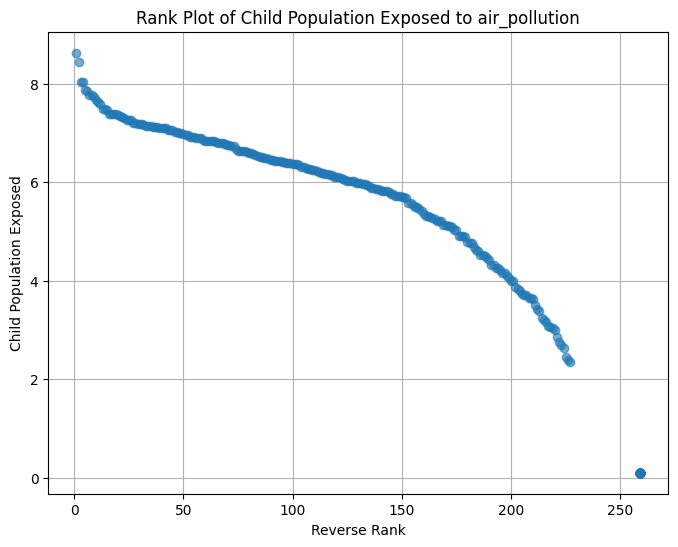

processed : vectorborne_malariapv min: 0.1 max: 8.523170624739743
vectorborne_malariapv: Log Transformation and Scaling - skew=1.816, kurtosis=1.649
IQR processed : vectorborne_malariapv min: 0.1 max: 0.1


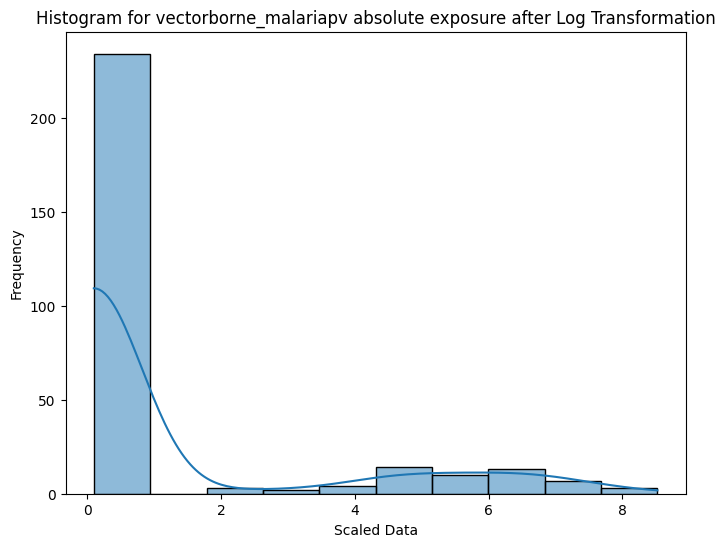

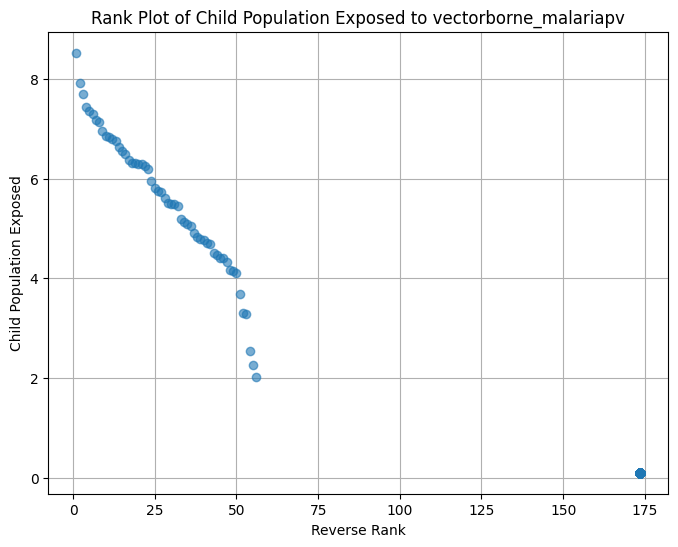

processed : sand_dust min: 0.1 max: 7.20596813310498
sand_dust: Log Transformation and Scaling - skew=0.298, kurtosis=-1.376
IQR processed : sand_dust min: -6.582719657830477 max: 11.237866096384128


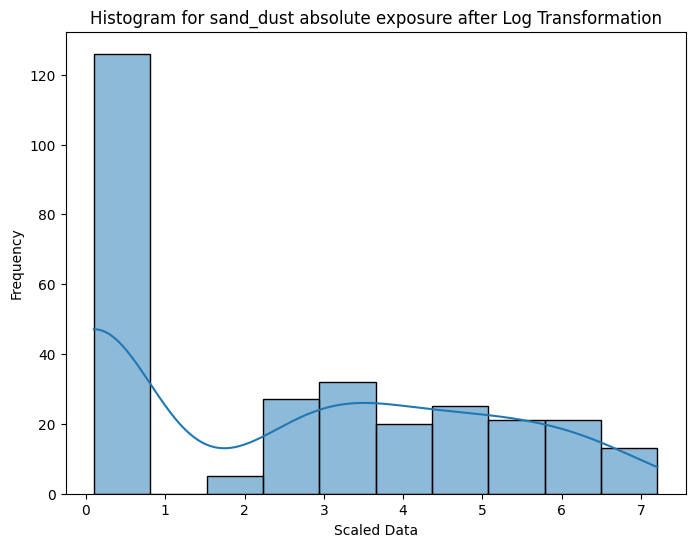

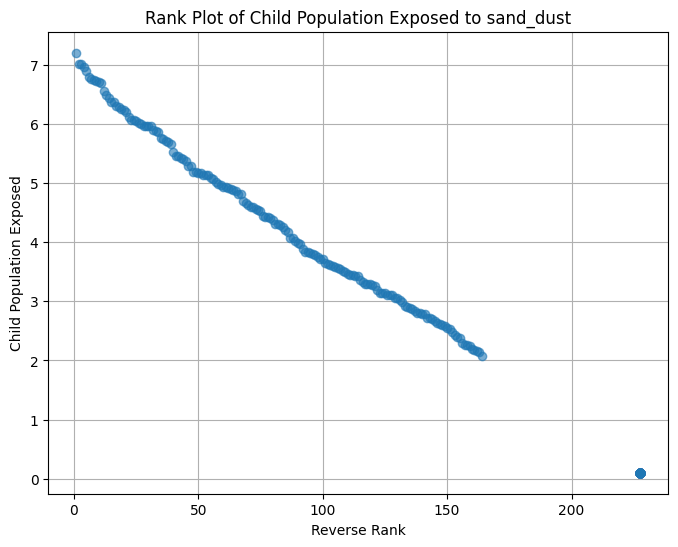

processed : vectorborne_malariapf min: 0.1 max: 8.043459123889761
vectorborne_malariapf: Log Transformation and Scaling - skew=1.035, kurtosis=-0.728
IQR processed : vectorborne_malariapf min: -6.449522064722002 max: 11.015870107870002


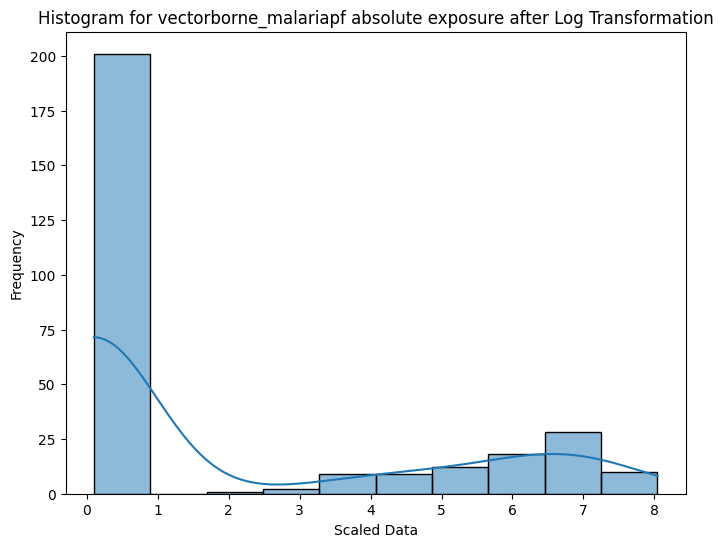

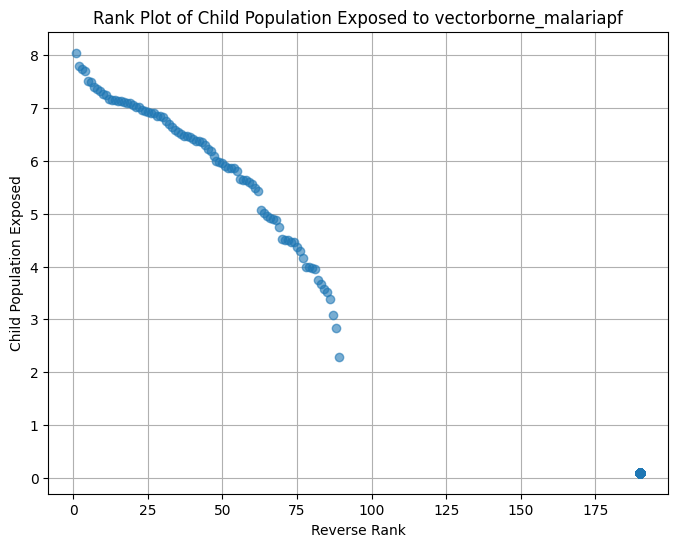

In [11]:

# Folder containing the CSV files
path = r'/content/drive/MyDrive/p1_exposure'
all_files = glob.glob(path + "/*.csv")

for file in all_files:
    # Exclude the specified file
    df = pd.read_csv(file, index_col=None, header=0)
    filename_only = file.split('/')[-1]
    hazard_name = '_'.join(filename_only.split('_')[:2])

    if 'iso3' not in df.columns or 'child_population_exposed' not in df.columns:
        continue  # Skip files missing required columns

    df = df[['iso3', 'child_population_exposed']].dropna()

    # Apply iterative trimming
    # before data trimming, log10 is applied to values higher than 100 otherwise asign 0.1
    df['child_population_exposed'] = df['child_population_exposed'].dropna().values  # Ensure no NaNs
    with np.errstate(divide='ignore'):
      df['child_population_exposed'] = np.where(
          df['child_population_exposed'] > 100,
          np.log10(df['child_population_exposed']),
          0.1
      )
    trimmed_values, min_trimmed, max_trimmed = trim_outliers_iteratively(df['child_population_exposed'])
    iqr_trimmed_values, iqr_lower_bound, iqr_upper_bound = boxplot_outlier_detection(df['child_population_exposed'])

    print(f"processed : {hazard_name} min: {min_trimmed} max: {max_trimmed}" )
    current_skew = skew(trimmed_values)
    current_kurtosis = kurtosis(trimmed_values)
    print(f"{hazard_name}: Log Transformation and Scaling - skew={current_skew:.3f}, kurtosis={current_kurtosis:.3f}")
    print(f"IQR processed : {hazard_name} min: {iqr_lower_bound} max: {iqr_upper_bound}" )

    # Plot histogram and normality check
    plt.figure(figsize=(8, 6))
    sns.histplot(df['child_population_exposed'], kde=True)
    plt.title(f"Histogram for {hazard_name} absolute exposure after Log Transformation")
    plt.xlabel("Scaled Data")
    plt.ylabel("Frequency")
    plt.show()

    # Compute ranks in reverse order
    df['rank_reverse'] = df['child_population_exposed'].rank(method='average', ascending=False)
    plt.figure(figsize=(8, 6))
    plt.plot(df['rank_reverse'], df['child_population_exposed'], marker='o', linestyle='', alpha=0.6)
    plt.xlabel("Reverse Rank")
    plt.ylabel("Child Population Exposed")
    plt.title(f"Rank Plot of Child Population Exposed to {hazard_name}")
    plt.grid(True)
    plt.show()



0.0
32.92893918465955
Processed: drought_spi | Min: 0.00556701652561771 | Max: 2.6305295683060037
drought_spi: Log Transformation - skew=1.812, kurtosis=2.711
IQR processed : drought_spi min: -65.30720713491387 max: 108.84534522485644


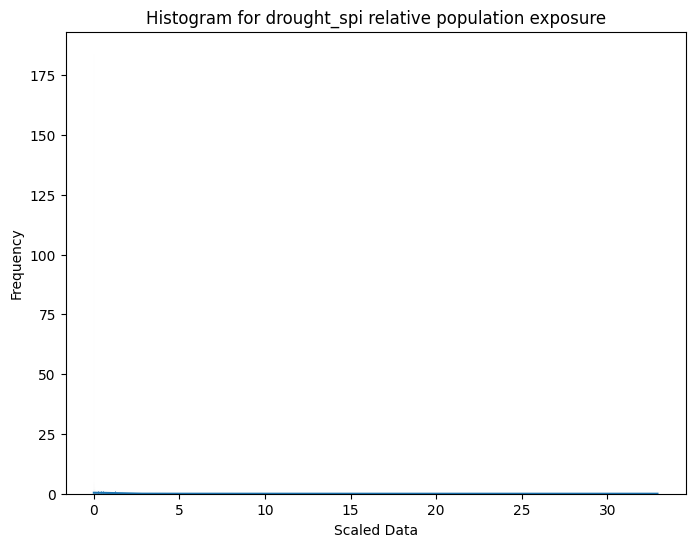

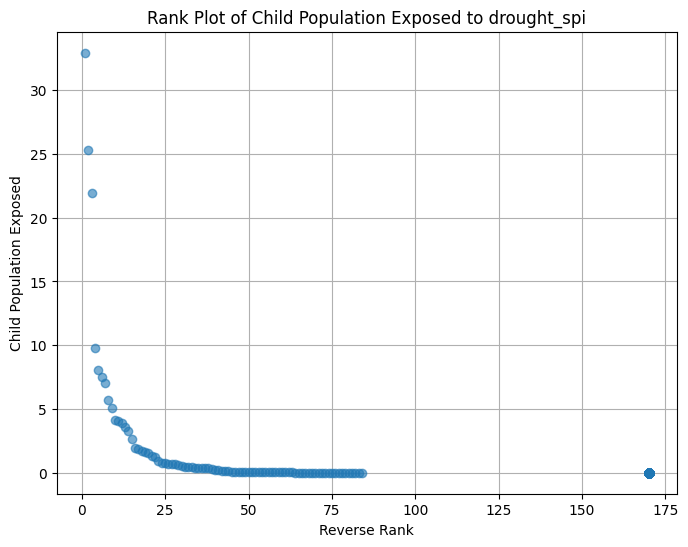

0.0
100.00000000000003
Processed: heatwave_frequency | Min: 4.1532003971606005e-05 | Max: 100.0
heatwave_frequency: Log Transformation - skew=0.012, kurtosis=-1.385
IQR processed : heatwave_frequency min: -2648740.477775676 max: 4414567.462959461


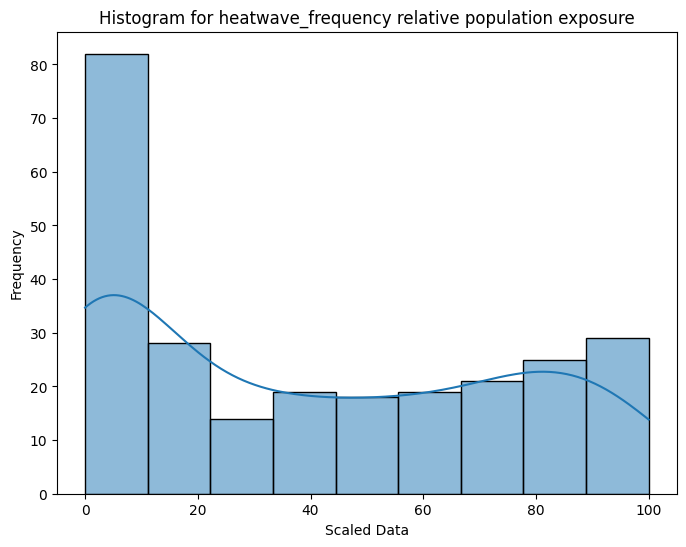

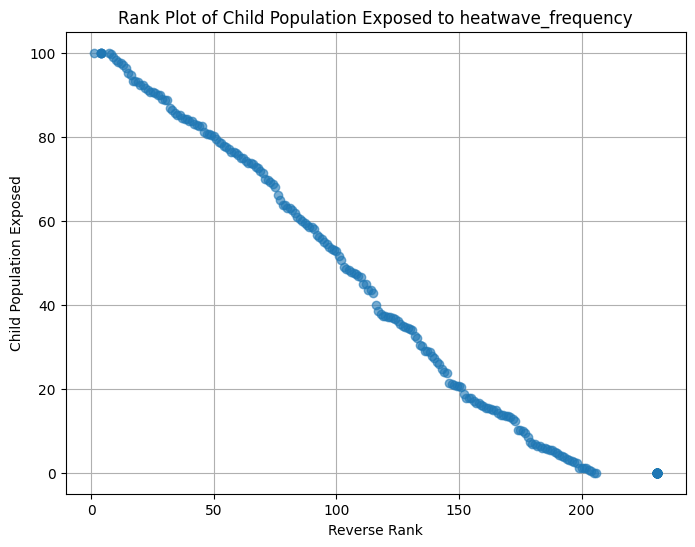

0.0
100.00000000000003
Processed: heatwave_severity | Min: 9.290692469498038e-05 | Max: 100.0
heatwave_severity: Log Transformation - skew=0.147, kurtosis=-1.638
IQR processed : heatwave_severity min: -106783.07217577785 max: 177971.78695962974


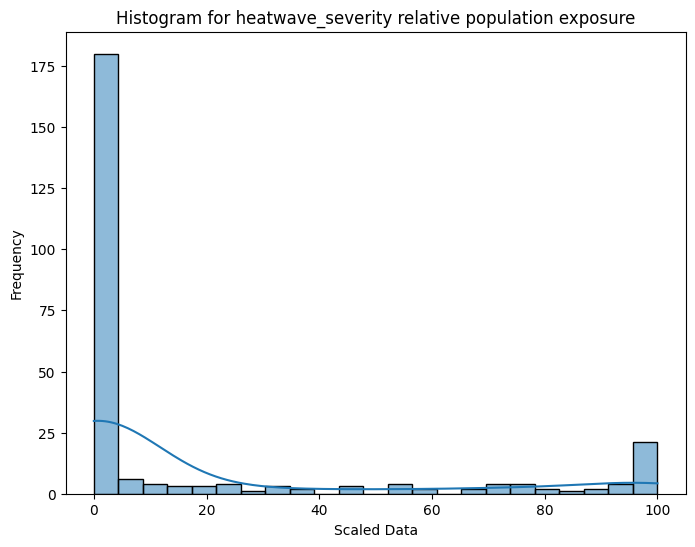

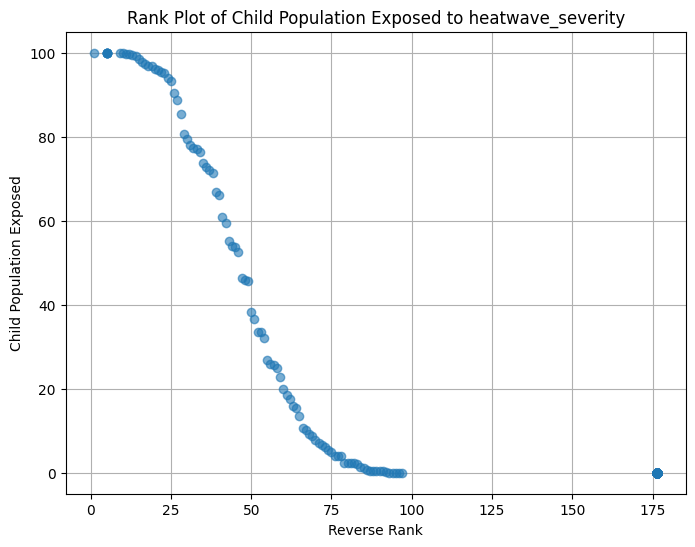

0.0
100.0
Processed: extreme_heat | Min: 0.0037795623485753246 | Max: 99.98183121998483
extreme_heat: Log Transformation - skew=0.650, kurtosis=-1.028
IQR processed : extreme_heat min: -444087.8935371964 max: 740146.4892286607


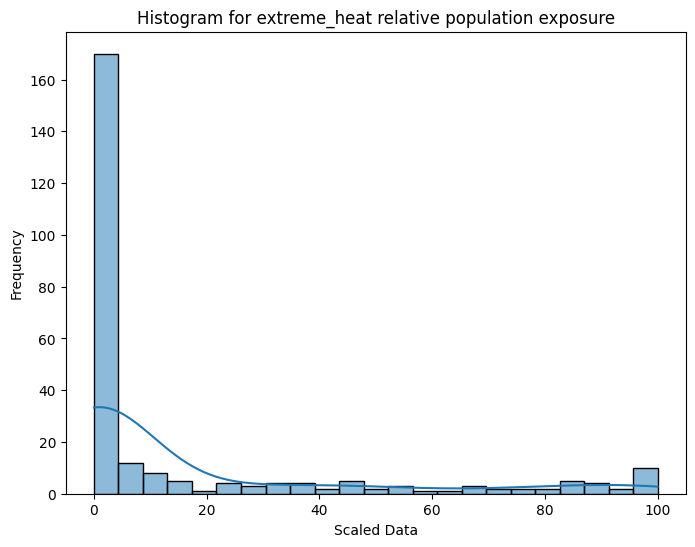

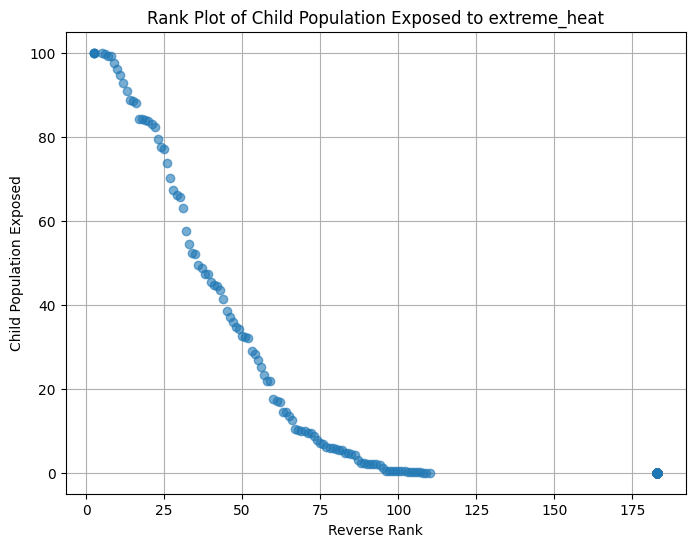

0.0
100.00000000000003
Processed: tropical_storm | Min: 1.5916521510026303e-05 | Max: 100.0
tropical_storm: Log Transformation - skew=-1.189, kurtosis=-0.259
IQR processed : tropical_storm min: -86242.18653662884 max: 143736.97756104806


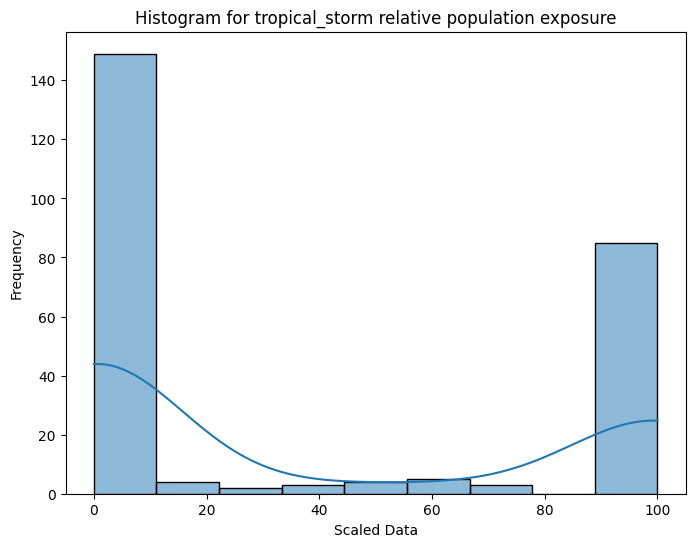

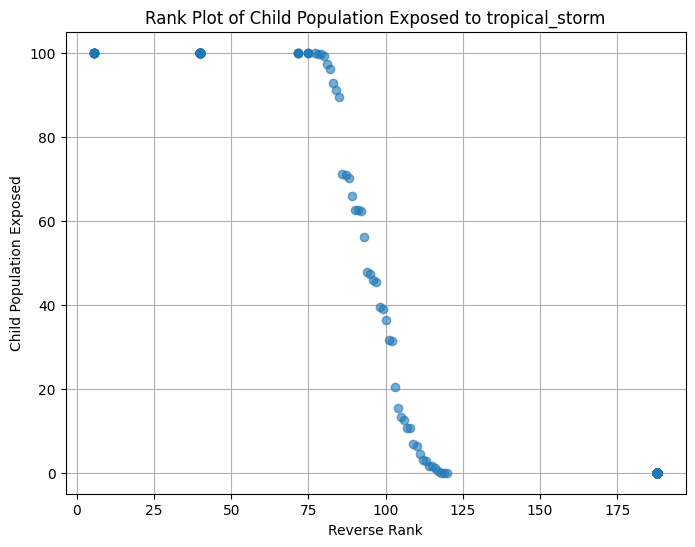

0.0
75.90565373748571
Processed: river_flood | Min: 0.2718766596401597 | Max: 33.229055543494404
river_flood: Log Transformation - skew=1.743, kurtosis=3.215
IQR processed : river_flood min: -327140.85672393336 max: 545234.7612065556


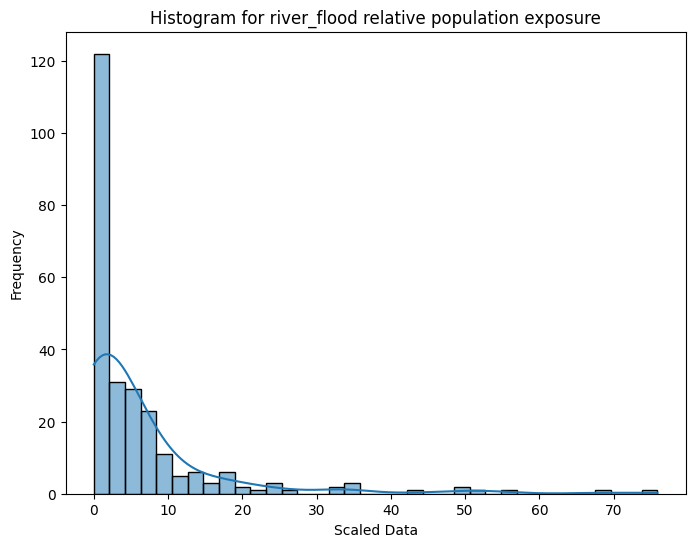

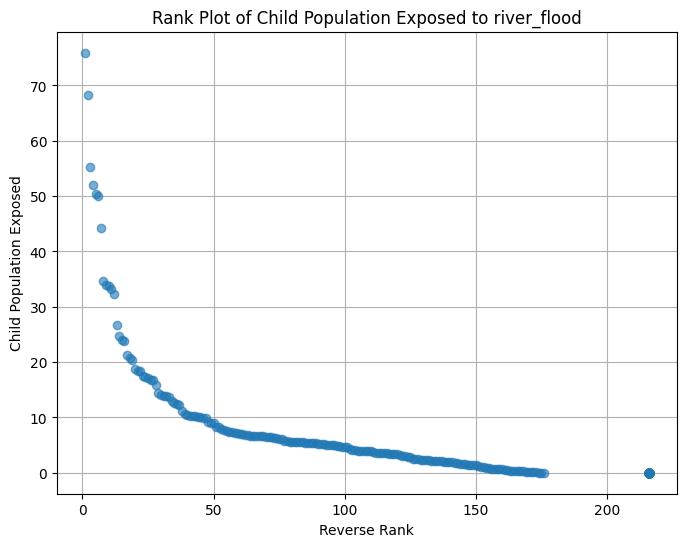

0.0
13.90095272283177
Processed: drought_sma | Min: 0.008431848180461781 | Max: 3.7938386068942966
drought_sma: Log Transformation - skew=1.869, kurtosis=2.973
IQR processed : drought_sma min: 0.0 max: 0.0


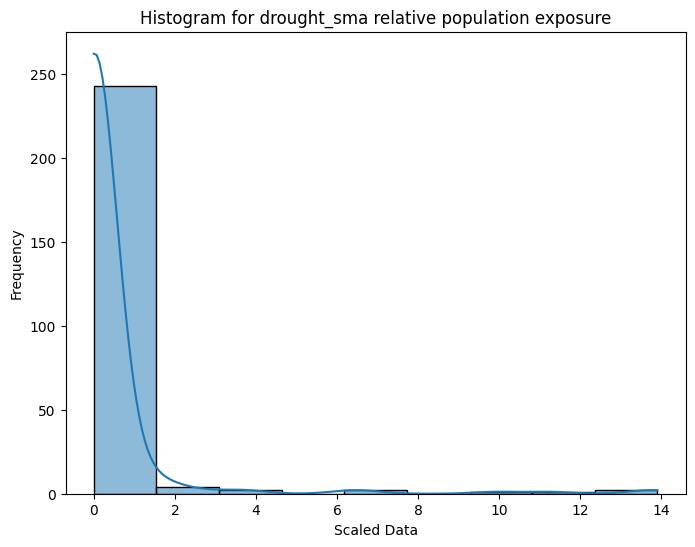

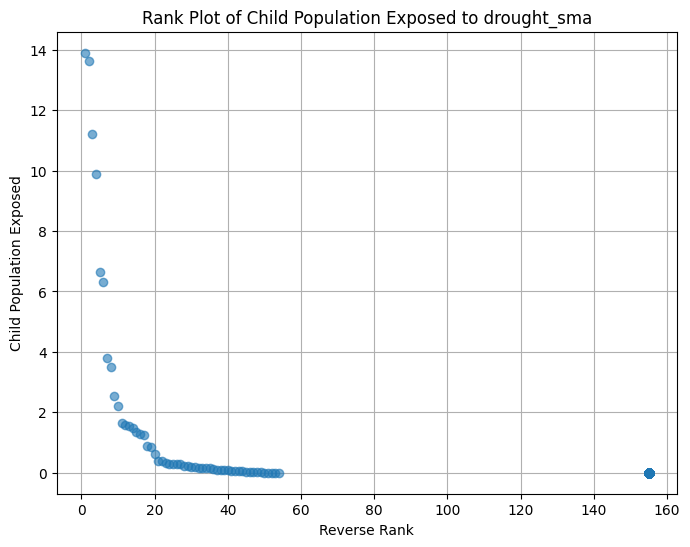

0.0
100.00000000000003
Processed: heatwave_duration | Min: 0.003044271802471381 | Max: 100.0
heatwave_duration: Log Transformation - skew=0.223, kurtosis=-1.247
IQR processed : heatwave_duration min: -2722588.092765099 max: 4537646.821275165


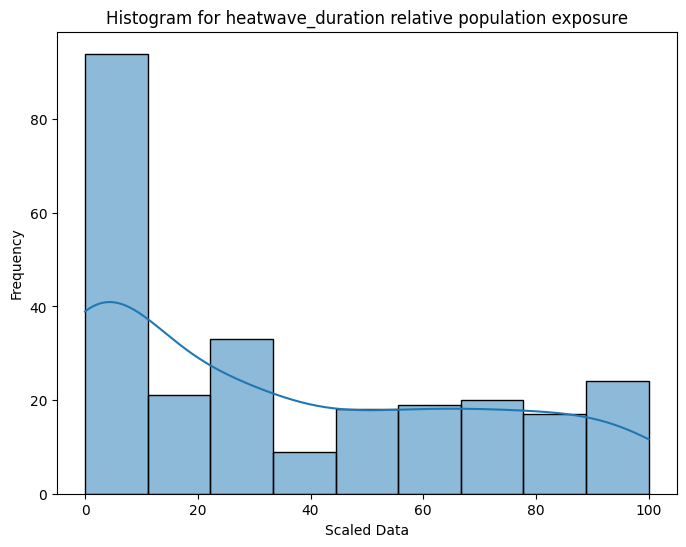

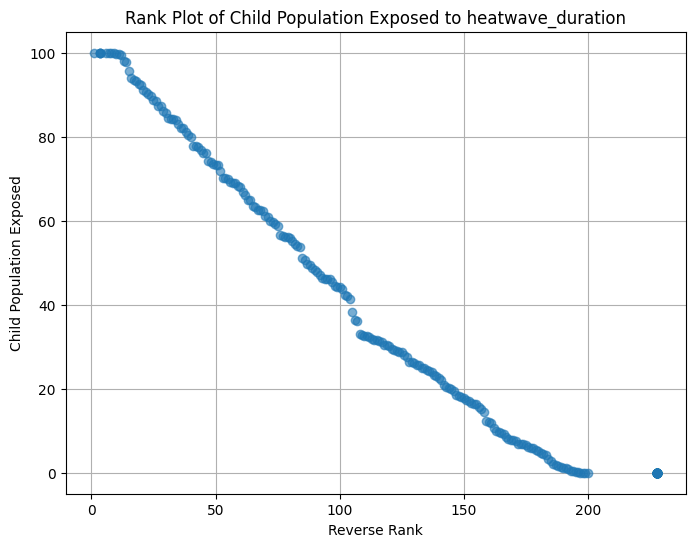

0.0
46.50284264715862
Processed: coastal_flood | Min: 0.02915144864148872 | Max: 4.228167099433362
coastal_flood: Log Transformation - skew=1.821, kurtosis=2.900
IQR processed : coastal_flood min: -8016.326235764522 max: 13360.543726274202


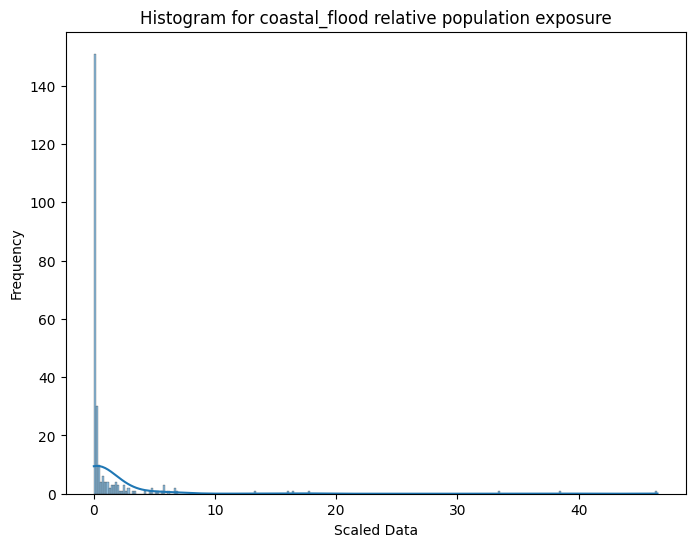

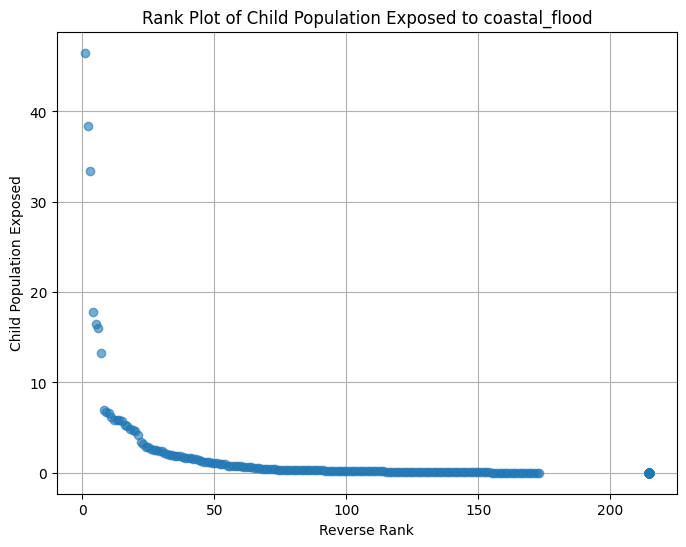

0.0
88.95648117299348
Processed: agricultural_drought | Min: 0.00043974965053839417 | Max: 79.68051966204902
agricultural_drought: Log Transformation - skew=1.625, kurtosis=1.678
IQR processed : agricultural_drought min: -330322.45274448255 max: 550537.4212408043


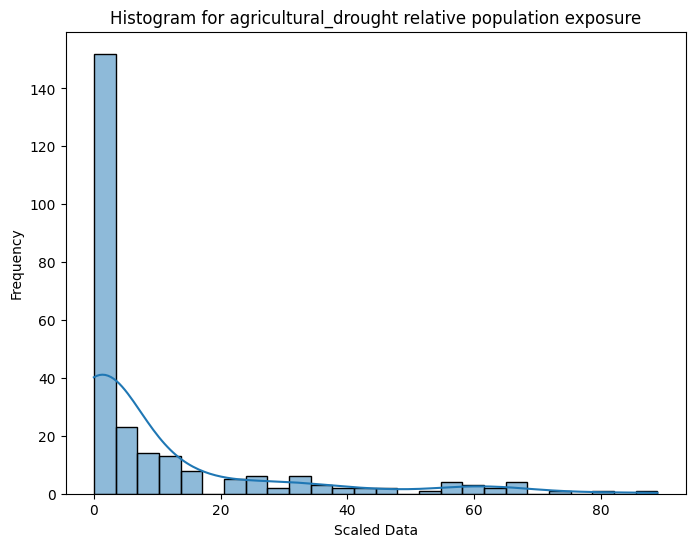

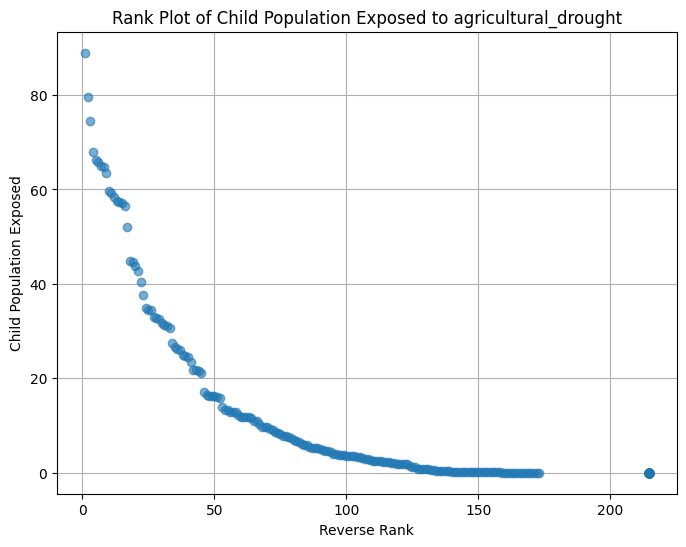

0.0
49.54494827725101
Processed: fire_FRP | Min: 0.1742059634439557 | Max: 22.0319184637971
fire_FRP: Log Transformation - skew=1.760, kurtosis=3.377
IQR processed : fire_FRP min: -265477.1841569603 max: 442461.9735949338


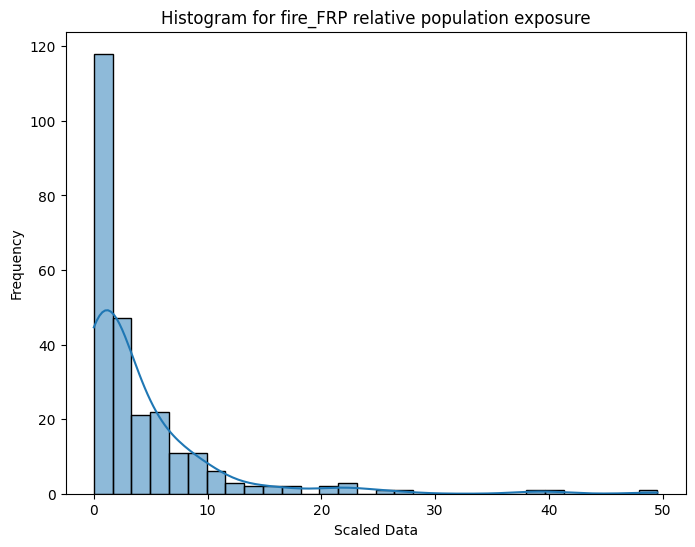

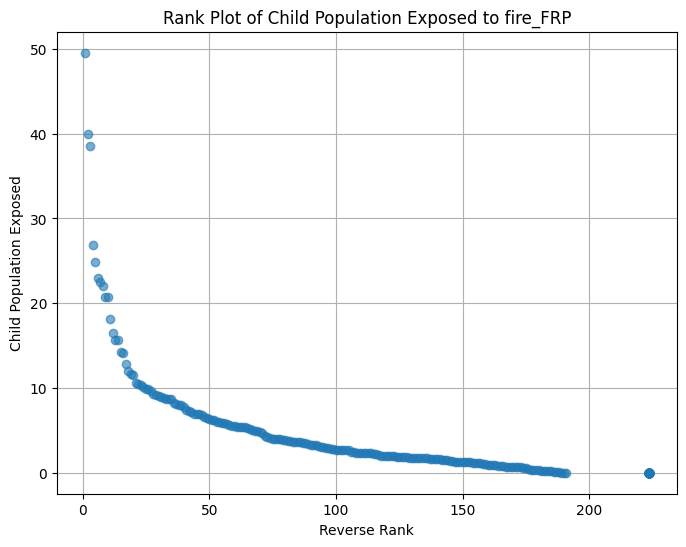

0.0
72.01886442294729
Processed: fire_frequency | Min: 0.08023263188640528 | Max: 27.602067422159244
fire_frequency: Log Transformation - skew=1.826, kurtosis=3.321
IQR processed : fire_frequency min: -186111.44855555863 max: 310185.74759259773


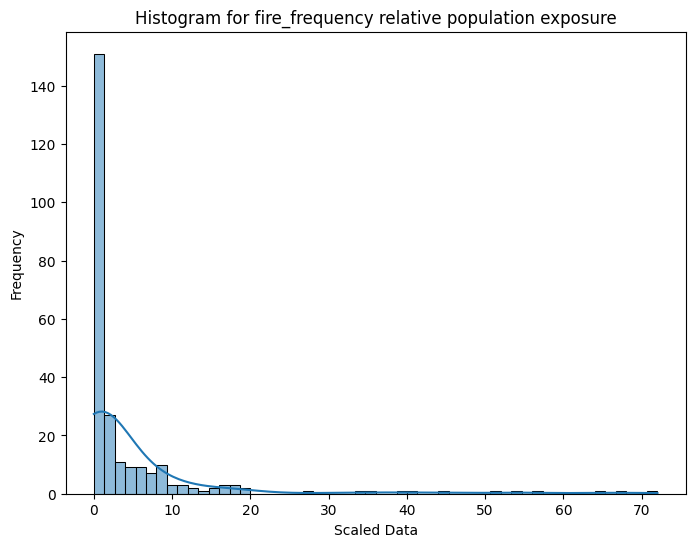

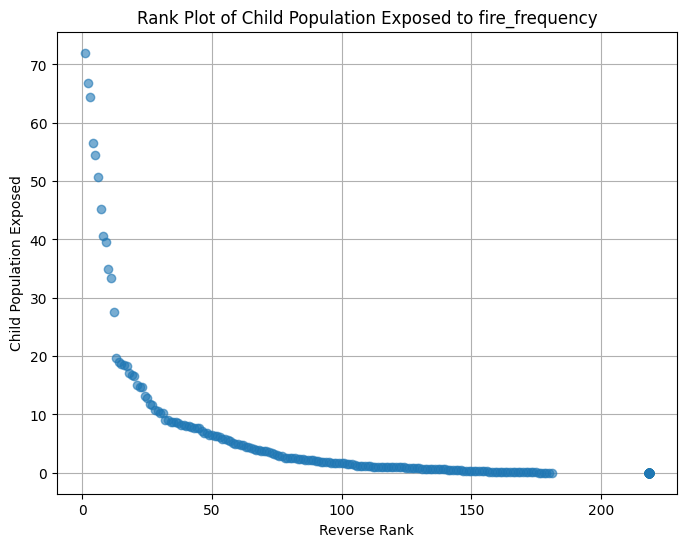

0.0
100.00000000000004
Processed: air_pollution | Min: 0.008194572225026585 | Max: 100.00000000000003
air_pollution: Log Transformation - skew=-1.816, kurtosis=2.410
IQR processed : air_pollution min: -7779902.647123289 max: 12969598.218445636


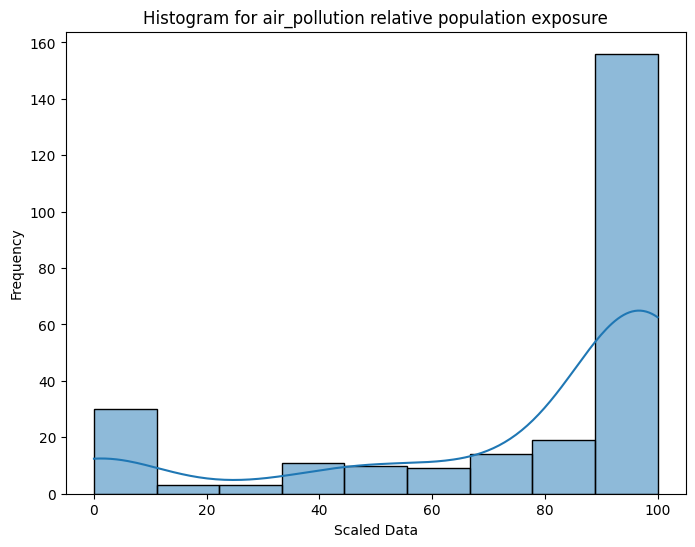

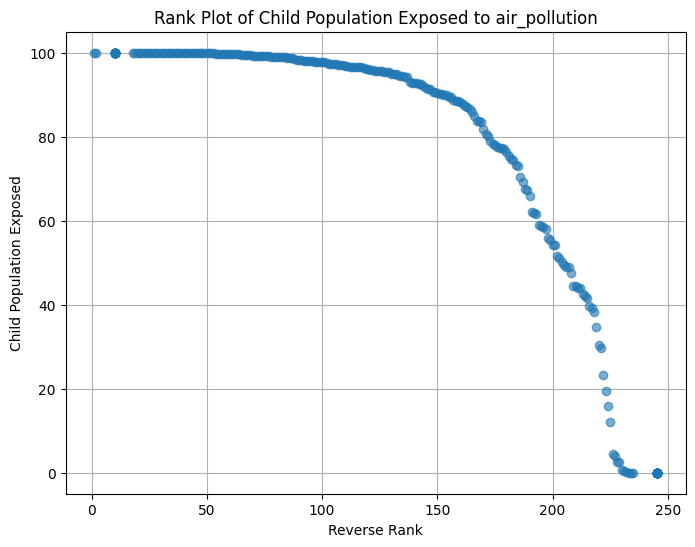

0.0
99.99443008609866
Processed: vectorborne_malariapv | Min: 0.00028292522391126627 | Max: 99.93658561284295
vectorborne_malariapv: Log Transformation - skew=0.495, kurtosis=-1.502
IQR processed : vectorborne_malariapv min: 0.0 max: 0.0


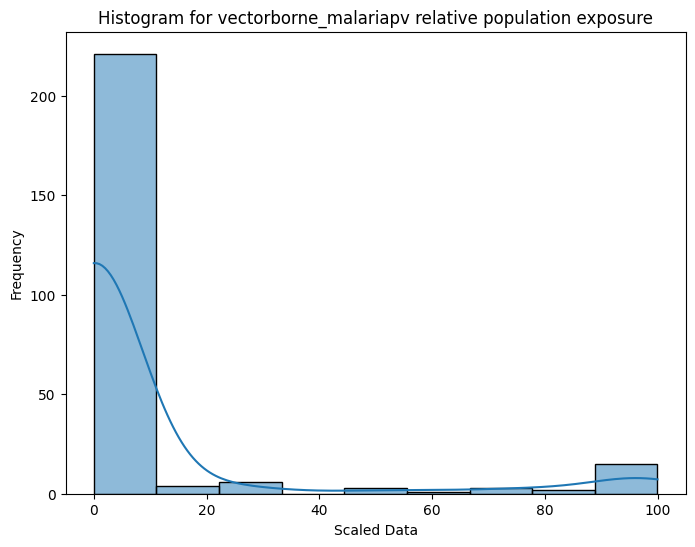

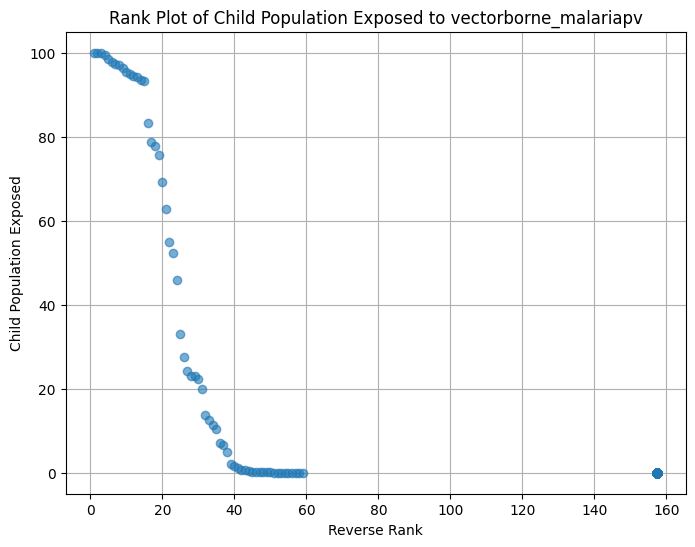

0.0
100.0
Processed: sand_dust | Min: 0.01552870730664866 | Max: 12.451761104018487
sand_dust: Log Transformation - skew=1.906, kurtosis=2.847
IQR processed : sand_dust min: -53861.84848216009 max: 89769.74747026681


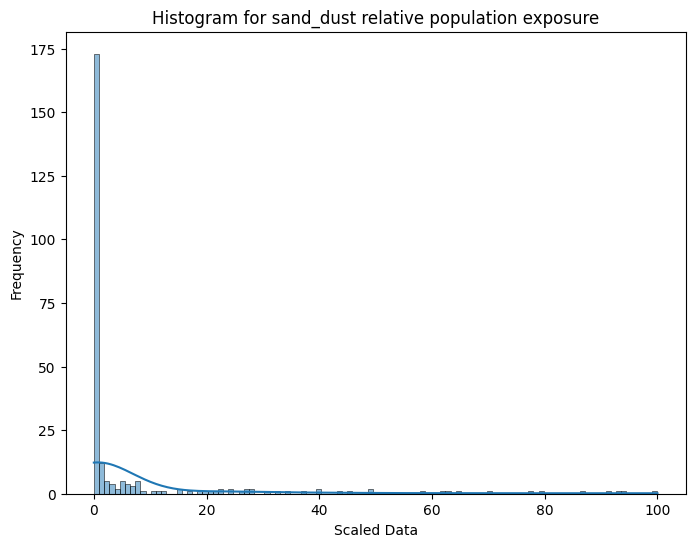

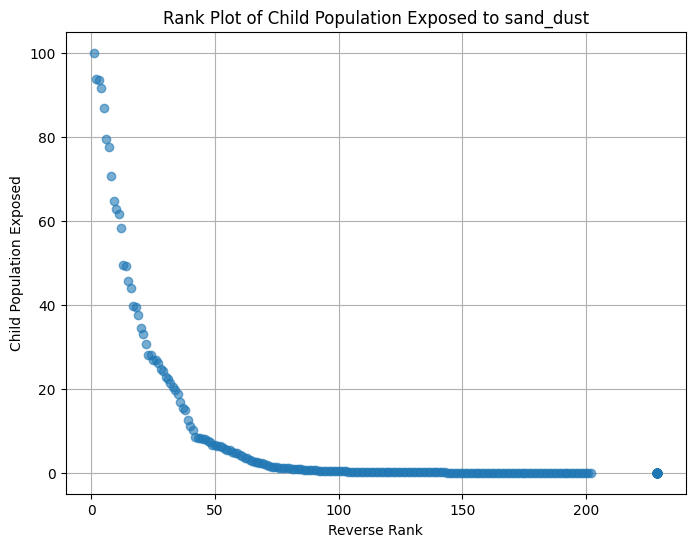

0.0
100.0
Processed: vectorborne_malariapf | Min: 0.00010586668827015425 | Max: 99.99999999999997
vectorborne_malariapf: Log Transformation - skew=-0.188, kurtosis=-1.810
IQR processed : vectorborne_malariapf min: -43897.763477927685 max: 73162.93912987947


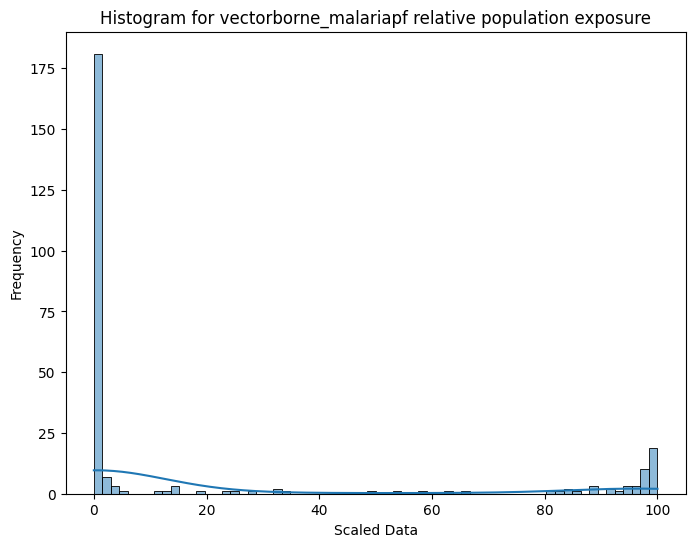

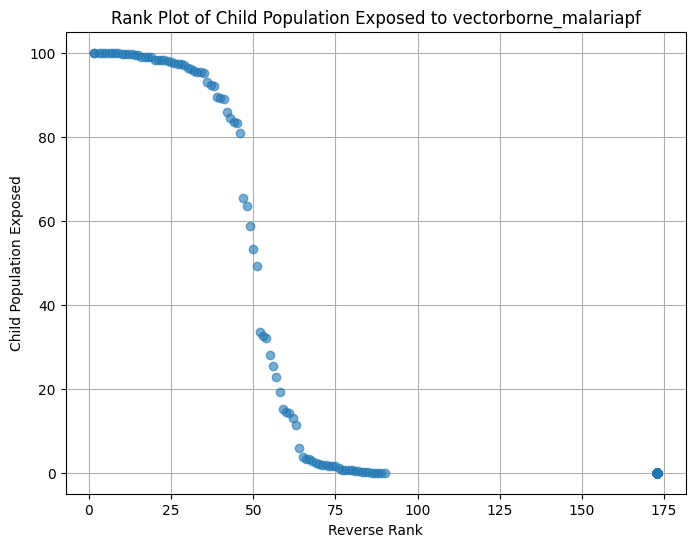

In [12]:

# Process each hazard file
for file in all_files:
    # Exclude the total population file
    df = pd.read_csv(file, index_col=None, header=0)
    filename_only = file.split('/')[-1]
    hazard_name = '_'.join(filename_only.split('_')[:2])

    if 'iso3' not in df.columns or 'child_population_exposed' not in df.columns:
        continue  # Skip files missing required columns

    df = df[['iso3', 'child_population_exposed','child_population_total']].dropna()
    df['relative_population_exposure'] = np.where(
        (df['child_population_total'] > 0) & (~df['child_population_total'].isna()),
        (df['child_population_exposed'] / df['child_population_total']) * 100,
        np.nan  # Assign NaN instead of inf
    )

    print( df['relative_population_exposure'].min())
    print( df['relative_population_exposure'].max())
    # Apply iterative trimming
    # Trim outliers
    trimmed_values, min_trimmed, max_trimmed = trim_outliers_iteratively(df['relative_population_exposure'])
    iqr_trimmed_values, iqr_lower_bound, iqr_upper_bound = boxplot_outlier_detection(df['child_population_exposed'])
    # Check if there are enough values to calculate skewness and kurtosis
    if len(trimmed_values) > 2:
        current_skew = skew(trimmed_values)
        current_kurtosis = kurtosis(trimmed_values)
    else:
        current_skew, current_kurtosis = np.nan, np.nan

    print(f"Processed: {hazard_name} | Min: {min_trimmed} | Max: {max_trimmed}" )
    print(f"{hazard_name}: Log Transformation - skew={current_skew:.3f}, kurtosis={current_kurtosis:.3f}")
    print(f"IQR processed : {hazard_name} min: {iqr_lower_bound} max: {iqr_upper_bound}" )

    # Plot histogram and normality check
    plt.figure(figsize=(8, 6))
    sns.histplot(df['relative_population_exposure'], kde=True)
    plt.title(f"Histogram for {hazard_name} relative population exposure")
    plt.xlabel("Scaled Data")
    plt.ylabel("Frequency")
    plt.show()


    # Compute ranks in reverse order
    df['rank_reverse'] = df['relative_population_exposure'].rank(method='average', ascending=False)
    plt.figure(figsize=(8, 6))
    plt.plot(df['rank_reverse'], df['relative_population_exposure'], marker='o', linestyle='', alpha=0.6)
    plt.xlabel("Reverse Rank")
    plt.ylabel("Child Population Exposed")
    plt.title(f"Rank Plot of Child Population Exposed to {hazard_name}")
    plt.grid(True)
    plt.show()




In [13]:
import os
import numpy as np
import pandas as pd
import glob
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import skew, kurtosis

# Define file paths
exposure_path = "/content/drive/MyDrive/p1_exposure"

# Get all CSV files for exposure
exposure_files = glob.glob(os.path.join(exposure_path, "*.csv"))

# Initialize empty list for processed data
exposure_data_list = []

### **Process Each File in One Loop**
for file in exposure_files:

    df = pd.read_csv(file)  # Read full file to check available columns
    filename_only = os.path.basename(file)
    hazard_name = '_'.join(filename_only.split('_')[:2])  # Extract hazard name

    # Ensure required columns exist
    required_cols = {'iso3', 'adm0_name', 'child_population_exposed', 'child_population_total'}
    if not required_cols.issubset(df.columns):
        print(f"Skipping {file}: Missing columns {required_cols - set(df.columns)}")
        continue  # Skip if required columns are missing

    df.dropna(subset=['child_population_exposed'], inplace=True)

    ### **Step 1: Absolute Exposure Processing**
    # Log transform with clipping for values >100, otherwise assign 0.1
    df['absolute_exposure'] = np.where(df['child_population_exposed'] > 100,
                                       np.log10(df['child_population_exposed'].clip(lower=1)),  # Clip to avoid log10(0)
                                       0.1)
    #open min_max data file and use them to normalize the values
    df_min_max = pd.read_csv('/content/drive/MyDrive/CCRI_results_misc/p1_min_max.csv')
    min_trimmed = df_min_max.loc[(df_min_max['filename'] == hazard_name) & (df_min_max['type'] == 'abs'),'min'].values[0]
    max_trimmed = df_min_max.loc[(df_min_max['filename'] == hazard_name) & (df_min_max['type'] == 'abs'),'max'].values[0]

    # clip to min max
    df['absolute_exposure'] = np.clip(df['absolute_exposure'], min_trimmed, max_trimmed)

    # Normalize using min_trimmed and max_trimmed
    df['absolute_value_normalized'] = 10 * (df['absolute_exposure'] - min_trimmed) / (max_trimmed - min_trimmed)

    ### **Step 2: Relative Exposure Processing**

    # Compute relative exposure (%)
    df['relative_exposure'] = np.where(
        (df['child_population_total'] > 0) & (~df['child_population_total'].isna()),
        (df['child_population_exposed'] / df['child_population_total']) * 100,
        0
    )

    #get min max values for relative exposures
    min_trimmed = df_min_max.loc[(df_min_max['filename'] == hazard_name) & (df_min_max['type'] == 'rel'),'min'].values[0]
    max_trimmed = df_min_max.loc[(df_min_max['filename'] == hazard_name) & (df_min_max['type'] == 'rel'),'max'].values[0]

    # Normalize relative exposure
    df['relative_exposure'] = np.clip(df['relative_exposure'], min_trimmed, max_trimmed)
    df['relative_value_normalized'] = 10 * (df['relative_exposure'] - min_trimmed) / (max_trimmed - min_trimmed)

    #If absolute value is zero, relative is also zero
    df.loc[df['absolute_value_normalized'] == 0, 'relative_value_normalized'] = 0
    df.loc[df['relative_value_normalized'] == 0, 'absolute_value_normalized'] = 0

    # Rename columns for final merging
    df.rename(columns={
        'absolute_value_normalized': hazard_name + '_absolute',
        'relative_value_normalized': hazard_name + '_relative'
    }, inplace=True)

    # Append processed data to list
    exposure_data_list.append(df[['iso3', 'adm0_name',
                                  hazard_name + '_absolute',
                                  hazard_name + '_relative']])

### **Final Merge Step**
# Concatenate all processed DataFrames
merged_exposure_df = pd.concat(exposure_data_list, axis=1).drop_duplicates(subset=['iso3', 'adm0_name'])

# Ensure no duplicate columns before merging
merged_exposure_df = merged_exposure_df.loc[:, ~merged_exposure_df.columns.duplicated()]

# Save merged exposure data
output_path = "/content/drive/MyDrive/CCRI_results_misc/Merged_Exposure_Data.csv"
merged_exposure_df.to_csv(output_path, index=False)
print(f"Merged exposure data saved to {output_path}")


Merged exposure data saved to /content/drive/MyDrive/CCRI_results_misc/Merged_Exposure_Data.csv
